<a href="https://colab.research.google.com/github/danieltchikeva/Aprendizagem-bayesiana/blob/main/Aprendizagem_bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIVE BAYES
Aprendizagem bayesiana

# Base Risco de Crédito

In [ ]:
# IMPORTANDO A BIBLIOTECA. Gaussian é muito usado para cálculos genéricos/estatística

from sklearn.naive_bayes import GaussianNB

É voltado à probabilidade (teorema de Bayes)
Exemplos de aplicação:
*Filtros de spam
*Mineração de emoções
*separação de documentos(notícias...)
*Crédito(analisando Bases de dados histórica)

In [ ]:
# Carregar e visualizar os dados

base_risco_credito = pd.read_csv('/content/risco_credito.csv')
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
# PRÉ PROCESSAMENTO DOS DADOS. Separar as variáveis: x= atributos previsores, y= a classe
#  x= atributos previsores

X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
# y= a classe / respostas esperadas

y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
# Fazendo a conversão dos atributos categóricos para numéricos

from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
# Adicionando novas células de código

X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [ ]:
# Visualizar o resultado da nova variável(que está acima)

X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
# Salvar a variável pra não executarmos todo este processamento/CRIANDO NOVA BASE DE DADOS

import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [ ]:
# PRIMEIRO EXPERIMENTO COM NAIVE BAYES
# Fazendo treinamento dos algorítmos= geração de tabelas de probabilidades

naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# GERANDO A PREVISÃO/TREINAMENTO(é necessário fazer comparação dos atributos categ. e numé.)
# historia boa (0), garantias nenhuma (1), renda > 35 (2)
# historia ruim (2), divida alta (0), garantias adequadas (0), renda < 15 (0)

previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
# FAZENDO PREVISÕES
# Ver as características das classes

naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
# contar quantos atributos temos por classe(alto, baixo, moderado)
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
# Observar as probabilidades apriori(classe alto representa 42%, baixo=35%, moderado=21%)
# Aqui não é possível visualizar a tabela, mas c a linguagem R ou Weka é.
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

# Base de dados Censu

Aplicando o algorítmo Naive Bayes, treinado, nesta base de dados

In [ ]:
with open('/content/census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

UnpicklingError: pickle data was truncated

In [ ]:
#Checar se os dados foram carregados corretamente
#Temos 27676 registros por pessoa e 108 atributos; 27676 respostas se a pessoa este valor ou não
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
#Fazendo treinamento do algorítmo, previsao=criação de tabela de probabilidades
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
#Fazendo a comparação com registros reais e verificar os erros
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
#Calculando a taxa de acertos
#Por termos apenas duas classes <=50 e >=50, é tipo jogo cara e coroa
#Precisamos melhorar este algorítmo
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

0.4767656090071648

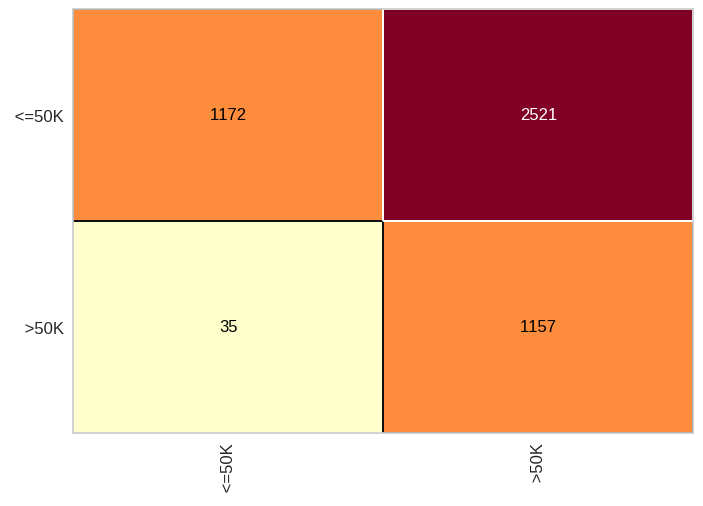

In [ ]:
#Criando a matriz de confusão
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

